In [2]:
!pip install kaggle tensorflow numpy pandas matplotlib scikit-learn split-folders

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"elhamlolo","key":"b56e2dd61367e682bf5fca1b0a1ea222"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: datas

In [8]:
import os
import splitfolders
import random
import sys
import shutil
import logging
import cv2
import time
import requests
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import tensorflow        as tf
from   tensorflow.keras.models        import load_model
from   tensorflow.keras.applications  import VGG16, ResNet50, MobileNetV2,InceptionResNetV2, InceptionV3,DenseNet201, Xception, EfficientNetB0
from   tensorflow.keras.models        import Sequential, Model
from   tensorflow.keras.layers        import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from   tensorflow.keras.preprocessing import image
from   tensorflow.keras.preprocessing.image import ImageDataGenerator
from   keras.callbacks                import EarlyStopping
from   sklearn.metrics                import accuracy_score, confusion_matrix,  precision_score, recall_score, classification_report, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from   io                             import BytesIO
from   PIL                            import Image

#os.environ['PYTHONHASHSEED'] = '0'
#random.seed(42)
#np.random.seed(42)
#tf.random.set_seed(42)

In [9]:
print ("Python version is     : " , sys.version   )
print ("tensorflow version is : " , tf.__version__)

# Get detailed information about GPU(s)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("\nTensorFlow is using the following GPU(s):")
    for gpu in gpus:
        print(gpu)
else:
    print("\nNo GPU detected or TensorFlow is not configured to use one.")

#pip show tensorflow

Python version is     :  3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
tensorflow version is :  2.19.0

TensorFlow is using the following GPU(s):
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [10]:
environment = 'colab'

if environment =='colab':
  inputFolder  = '/content/dataset/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/'
  outputFolder = '/content/dataset/CT_split2/'
  results_path  = '/content/dataset/Results/'

else:
  inputFolder  = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\dataset\\All\\CT_dataset\\'
  outputFolder = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\dataset\\All\\CT_split2\\'
  results_path  = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\Codes\My_Codes\\Results\\'

if not os.path.exists(results_path):
    os.makedirs(results_path)

<>:11: SyntaxWarning: invalid escape sequence '\M'
<>:11: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipython-input-1524226219.py:11: SyntaxWarning: invalid escape sequence '\M'
  results_path  = 'E:\\____My2024 Work\\___Research_Points\\Now\\Kidney Classification\\Codes\My_Codes\\Results\\'


In [11]:
train_dir    = outputFolder + 'train'
val_dir      = outputFolder + 'val'
test_dir     = outputFolder + 'test'

classes      = ['Cyst', 'Normal', 'Stone', 'Tumor']
random.seed(42)

IMAGE_WIDTH  = 224
IMAGE_HEIGHT = 224
num_classes  = 4
img_size     = (IMAGE_WIDTH, IMAGE_HEIGHT)
batch_size   = 32

#Done: DenseNet201, MobileNetV2, EfficientNetB0, ResNet50, VGG16, EfficientNetV2B0

#models     = ['VGG16', 'VGG19', 'ResNet50', 'ResNet101', 'ResNet152', 'DenseNet121', 'DenseNet169', 'DenseNet201', 'EfficientNetV2B0', 'EfficientNetB0', 'MobileNetV3Small', 'MobileNetV2' ,'InceptionResNetV2', 'InceptionV3', 'Xception']
models      = ['MobileNetV2' ,'InceptionResNetV2','InceptionV3', 'DenseNet201', 'Xception','VGG16' , 'ResNet50' ,'EfficientNetB0']
model_name  = 'MobileNetV2'
results_path= results_path + model_name+"/"
model_path  =  results_path #+ '_20Epochs.h5'

if not os.path.exists(model_path):
    os.makedirs(model_path)


In [12]:
splitfolders.ratio(inputFolder, outputFolder, seed=42, ratio=(0.8, 0.1, 0.1))

Copying files: 12446 files [00:09, 1283.74 files/s]


In [13]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders : ", os.listdir(test_dir))

Train_dir Subfolders:  ['Cyst', 'Stone', 'Normal', 'Tumor']
Valid_dir Subfolders:  ['Cyst', 'Stone', 'Normal', 'Tumor']
Test_dir Subfolders :  ['Cyst', 'Stone', 'Normal', 'Tumor']


In [14]:
image_train_gen =ImageDataGenerator(
                                    rescale           = 1./255,
                                    rotation_range    = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range= 0.1,
                                    horizontal_flip   = True,
                                    zoom_range        = 0.2
                                  )

image_valid_gen =ImageDataGenerator(
                                    rescale           = 1./255,
                                    rotation_range    = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range= 0.1,
                                    horizontal_flip   = True,
                                    zoom_range        = 0.2
                                  )

test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_ds = image_train_gen.flow_from_directory(
                                                train_dir,
                                                target_size= img_size,
                                                batch_size = batch_size,
                                                class_mode = 'sparse',
                                              )

valid_ds = image_valid_gen.flow_from_directory(
                                                val_dir,
                                                target_size= img_size ,
                                                batch_size = batch_size,
                                                class_mode = 'sparse',
                                               )
test_ds = test_datagen.flow_from_directory(
                                            test_dir,
                                            target_size= img_size ,
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            shuffle=False
                                           )

Found 9955 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.


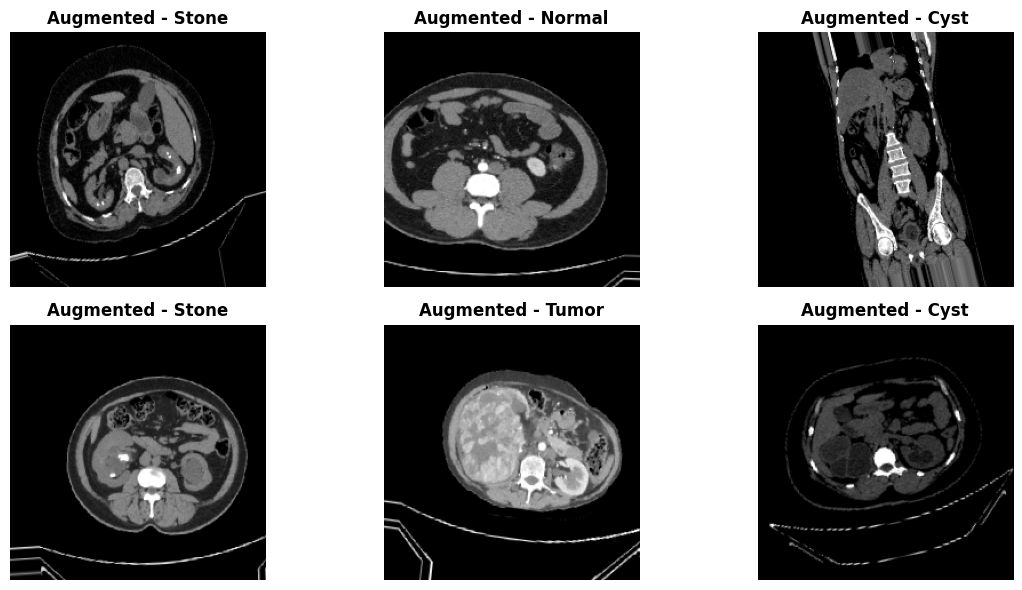

In [18]:
#show sample of augmented images
def show_augmented_images(dataset, num_images=6):

    images, labels = next(dataset)
    class_names    = list(dataset.class_indices.keys())

    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        img = images[i]
        label = class_names[int(labels[i])]

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Augmented - {label}", fontsize=12, fontweight='bold')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(results_path+ 'augmented_samples.png', dpi=300, bbox_inches='tight')

    plt.show()

show_augmented_images(train_ds, num_images=6)

In [21]:
model        = MobileNetV2(input_shape=(IMAGE_WIDTH , IMAGE_HEIGHT ,3), weights='imagenet', include_top=False, pooling='avg')

for layer in model.layers:
      layer.trainable = False

x     = Flatten()(model.output)
x     = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = model.input, outputs = x)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#model.summary()

In [24]:
EarlyStoppingMonitor  = EarlyStopping(patience=10)
history               = model.fit(train_ds, epochs= 20, validation_data=valid_ds, callbacks= [EarlyStoppingMonitor])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 191s 558ms/step - accuracy: 0.6394 - loss: 0.9193 - val_accuracy: 0.8269 - val_loss: 0.5288
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 149s 476ms/step - accuracy: 0.8278 - loss: 0.4792 - val_accuracy: 0.8414 - val_loss: 0.4178
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 150s 479ms/step - accuracy: 0.8655 - loss: 0.3877 - val_accuracy: 0.8744 - val_loss: 0.3660
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 149s 478ms/step - accuracy: 0.8901 - loss: 0.3264 - val_accuracy: 0.8696 - val_loss: 0.3604
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 148s 475ms/step - accuracy: 0.8988 - loss: 0.3024 - val_accuracy: 0.8961 - val_loss: 0.2928
Epoch 6/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 149s 476ms/step - accuracy: 0.9136 - loss: 0.2566 - val_accuracy: 0.9114 - val_loss: 0.2749
Epoch 7/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 148s 476ms/step - accuracy: 0.9139 - loss: 0.2553 - val_accuracy: 0.9163 - val_loss: 0.2428
Epoch 8/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 149s 477ms/step - accuracy: 0.9252 -

In [25]:
model.save(model_path + model_name + '_20Epochs.keras')

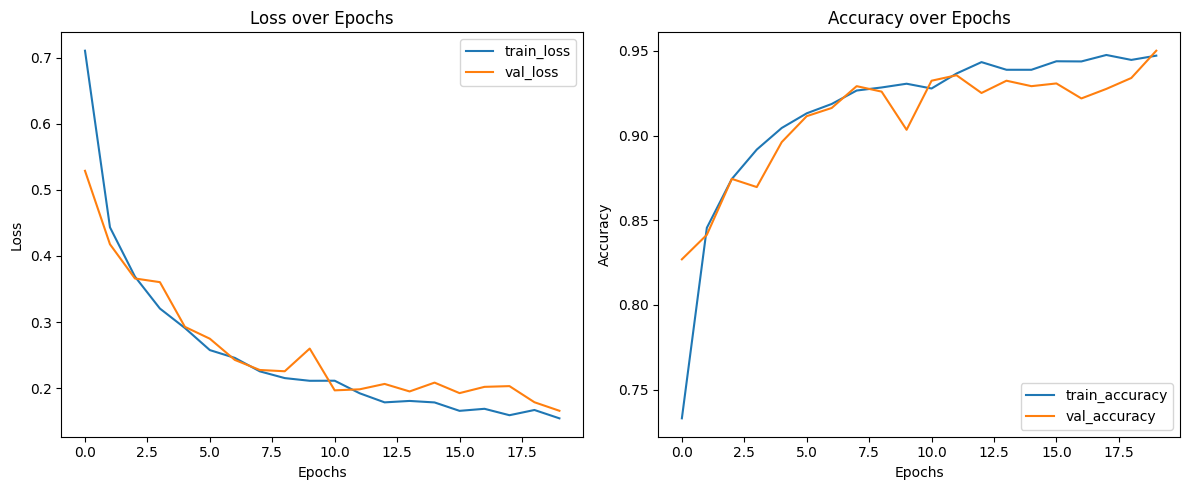

In [28]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss']    , label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy']    , label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')

plt.tight_layout()

# Save the figure
plt.savefig(results_path+ 'Loss_accuracy.png', dpi=300, bbox_inches='tight')

plt.show()

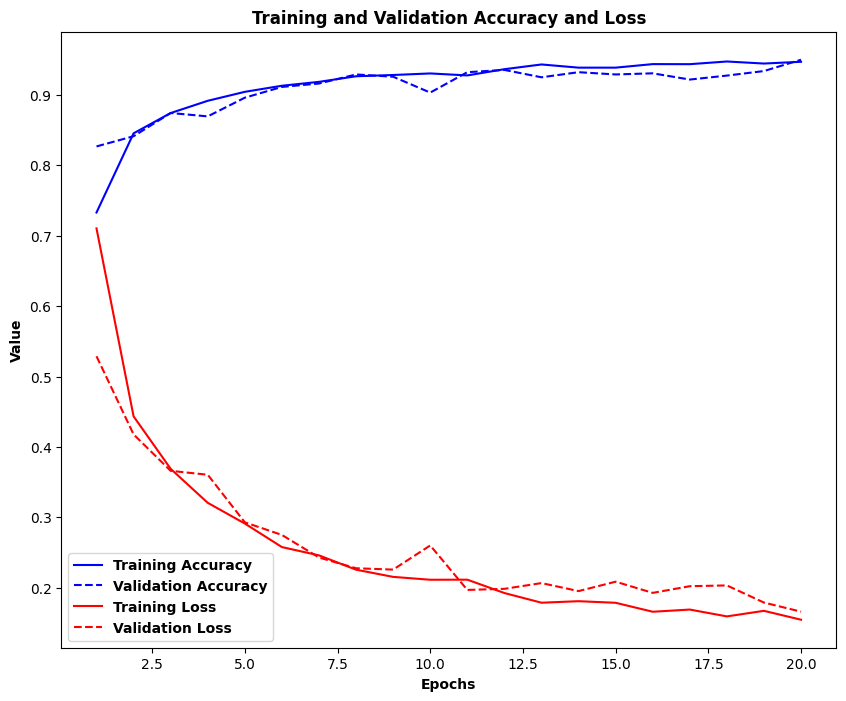

In [29]:
epochs  = range(1, len(history.history['accuracy']) + 1)
plt.figure(figsize=(10, 8))

# Plot accuracy
plt.plot(epochs, history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b--', label='Validation Accuracy')

# Plot loss
plt.plot(epochs, history.history['loss'], 'r-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'r--', label='Validation Loss')

plt.title('Training and Validation Accuracy and Loss', fontweight='bold')
plt.xlabel('Epochs', fontweight='bold')
plt.ylabel('Value', fontweight='bold')
plt.legend(prop={'weight':'bold'}, fontsize=16)
#plt.grid(True)

plt.savefig(results_path+ 'Loss_accuracy_oneFigure.png', dpi=300, bbox_inches='tight')

"""
# Labels & Title
ax.set_title("Sample Distribution by Class and Split")
ax.set_xticks(x)
ax.set_xticklabels(classes)
plt.legend(prop={'weight':'bold'}, fontsize=16)

# Titles and labels
plt.title("Sample Distribution by Class and Split", fontsize=14, fontweight="bold")
plt.xlabel("Classes", fontweight="bold", fontsize=12)
plt.ylabel("Number of Samples", fontweight="bold", fontsize=12)
plt.ylim(0, max(counts)-500)

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
plt.tight_layout()
plt.show()
"""
plt.show()

In [31]:
#1- Evaluate the model on the test data using `evaluate`
_, accuracy = model.evaluate(test_ds, batch_size=32)
print()
print('evaluation accuracy is :  %.3f' % (accuracy * 100.0))
print()

40/40 ━━━━━━━━━━━━━━━━━━━━ 14s 360ms/step - accuracy: 0.9361 - loss: 0.1936

evaluation accuracy is :  83.747



40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step


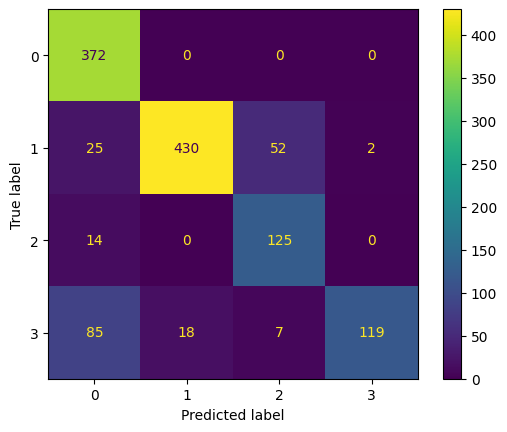

In [33]:
predictions            = model.predict(test_ds)
y_test                 = test_ds.classes

y_pred                 = np.argmax(predictions, axis=1)  # Get the index of the maximum value
cm                     = confusion_matrix(y_test, y_pred)

cmd                    = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot(include_values= True, cmap='viridis', ax=None, xticks_rotation='horizontal')

# Save the figure
plt.savefig(results_path + 'Confusion Matrix.png', dpi=300, bbox_inches='tight')

plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       372
           1       0.96      0.84      0.90       509
           2       0.68      0.90      0.77       139
           3       0.98      0.52      0.68       229

    accuracy                           0.84      1249
   macro avg       0.84      0.82      0.80      1249
weighted avg       0.87      0.84      0.83      1249



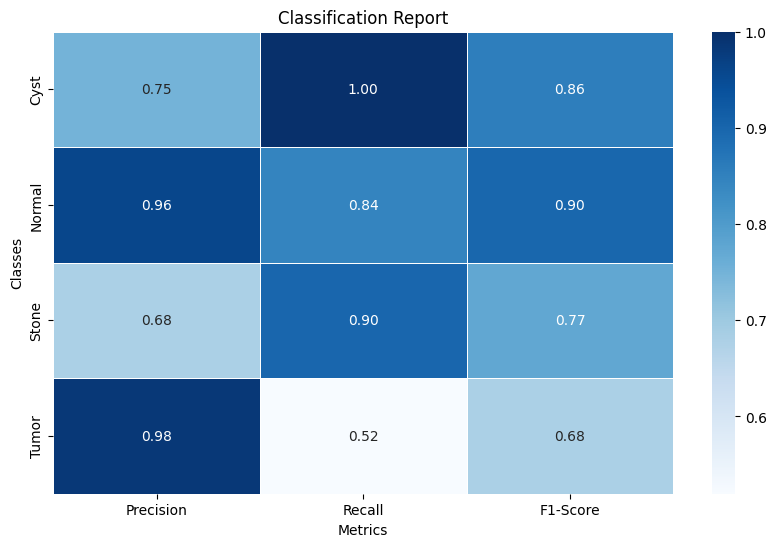

In [34]:
y_pred   = model.predict(test_ds)
y_test   = test_ds.classes

predicted_classes = [np.argmax(pred) for pred in predictions]

print(classification_report(y_test, predicted_classes))

report            = classification_report(y_test, predicted_classes, target_names=classes, output_dict=True)
metrics           = {label: report[label]        for label in classes if label in report}
precision_1       = [metrics[label]['precision'] for label in classes]
recall_1          = [metrics[label]['recall']    for label in classes]
f1_score_1        = [metrics[label]['f1-score']  for label in classes]

data = {
        'Precision': precision_1,
        'Recall'   : recall_1,
        'F1-Score' : f1_score_1
        }

df   = pd.DataFrame(data, index=classes)

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Save the figure
plt.savefig(results_path + 'Classification Report.png', dpi=300, bbox_inches='tight')

plt.show()

In [35]:
print ( ((precision_1[0]+ precision_1[1]+ precision_1[2]+ precision_1[3])/4)*100)
print ( ((recall_1[0]   + recall_1[1]   + recall_1[2]   + recall_1[3])/4)*100)
print ( ((f1_score_1[0] + f1_score_1[1] + f1_score_1[2] + f1_score_1[3])/4)*100)

84.31600822596376
81.59312359311167
80.24445633722884


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step


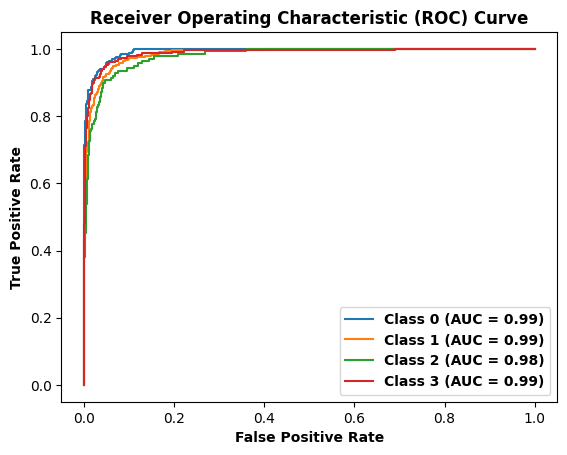

In [37]:
def plot_auc(predictions, y_test ):

    # Ensure that the target labels Y_test are in a 2-dimensional format
    if len(y_test.shape) == 1:
        y_test = np.eye(len(np.unique(y_test)))[y_test.astype(int)]

    # Compute the ROC curve and AUC score for each class
    fpr     = dict()
    tpr     = dict()
    roc_auc = dict()

    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
        roc_auc[i]        = roc_auc_score(y_test[:, i], predictions[:, i])

    # Plot the ROC curve for each class
    plt.figure()
    Classes = ['Normal', 'Cyst', 'Stone', 'Tumor']
    for i in range(y_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        #plt.plot(fpr[i], tpr[i], label=f'{Classes{i}} (AUC = {roc_auc[i]:.2f})')


    # Set the title and axis labels
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold')
    plt.xlabel('False Positive Rate', fontweight='bold')
    plt.ylabel('True Positive Rate', fontweight='bold')
    plt.legend(loc='lower right')
    plt.legend(prop={'weight':'bold'}, fontsize=16)

    # Save the figure
    plt.savefig(results_path + 'ROC.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

y_test = test_ds.classes
y_pred = model.predict(test_ds)
plot_auc(y_pred, y_test)


/content/dataset/CT_split2/test/Cyst/Cyst- (100).jpg
Cyst
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


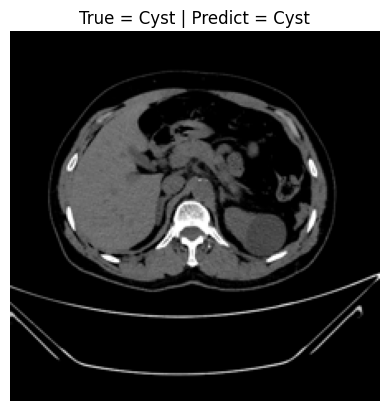

True = Cyst    Predict = Cyst


In [38]:
# Extract true label from image path
def extract_true_label(img_path):

    print (img_path)
    folder_name = os.path.basename(os.path.dirname(img_path))
    print (folder_name)

    if "Cyst" in folder_name:
        return "Cyst"
    elif "Normal" in folder_name:
        return "Normal"
    elif "Stone" in folder_name:
        return "Stone"
    elif "Tumor" in folder_name:
        return "Tumor"

    return "Unknown"

# Load and preprocess image
def load_and_preprocess_image(img_path, target_size):

    if img_path.startswith('http'):
        response = requests.get(img_path)
        img      = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        img      = image.load_img(img_path)

    # Resize image explicitly
    img          = img.resize(target_size)

    # Convert to array and normalize
    img_array    = image.img_to_array(img) / 255.0
    img_array    = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img, img_array


# Image path (URL or local)
img_path = test_dir + '/Cyst/Cyst- (100).jpg'#Cyst- (4).jpg

# Extract true label
true_label     = extract_true_label(img_path)

# Load and preprocess image
img, img_array = load_and_preprocess_image(img_path, img_size)

# Make prediction
pred       = model.predict(img_array)
pred_index = np.argmax(pred,axis=1)

if pred_index[0]   == 0:
  predicted_label = "Cyst"

elif pred_index[0] == 1:
  predicted_label = "Normal"

elif pred_index[0] == 2:
  predicted_label = "Stone"

elif pred_index[0] == 3:
  predicted_label = "Tumor"

# Display image
plt.imshow(img)
plt.axis('off')
plt.title(f"True = {true_label} | Predict = {predicted_label}")
plt.show()

# Print result
print(f"True = {true_label}    Predict = {predicted_label}")